# Analysis of the MD1 equilirium MADS-Sensitivity runs

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## SA STEP2

In [2]:
path='SA-MD1-STEP2_bnd/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

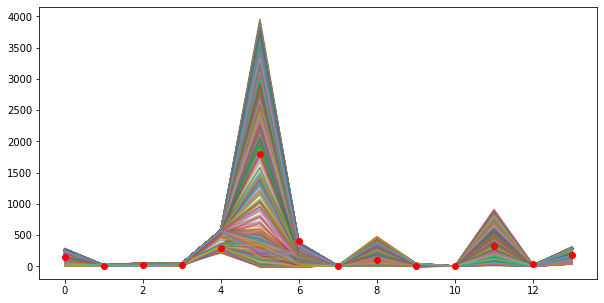

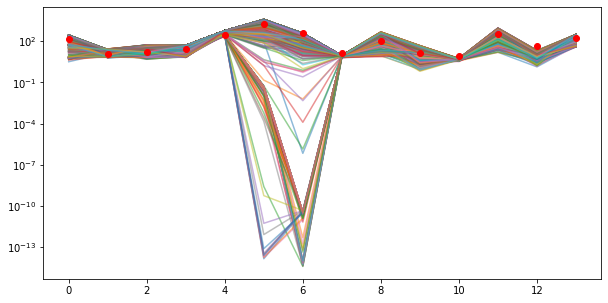

In [3]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

In [4]:
xparams, ymodel= ut.get_params(df_param,df_model,1,r2lim=0.95)

In [5]:
xparams

,nmax,nmax.1,nmax.2,nmax.3,krb(0),krb(0).1,krb(0).2,krb(0).3,krb(1),krb(1).1,krb(1).2,krb(2),krb(2).1,krb(2).2
493,3.190673,3.844962,4.442381,4.742262,-4.385666,-7.008715,-11.37096,-17.769008,-5.87623,-0.244528,-5.338464,-19.667449,-10.124426,-7.768532


In [6]:
 ymodel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
493,149.181589,7.667752,22.473809,48.966434,562.27851,1935.595386,208.493132,8.003346,13.889835,21.055051,4.742559,333.030145,9.378756,292.836688


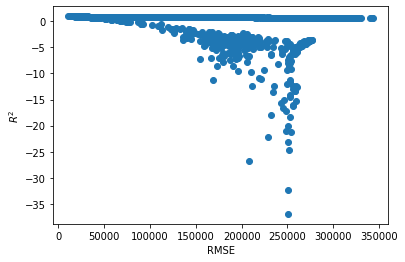

In [4]:
ut.plot_r2_rmse(df_model)

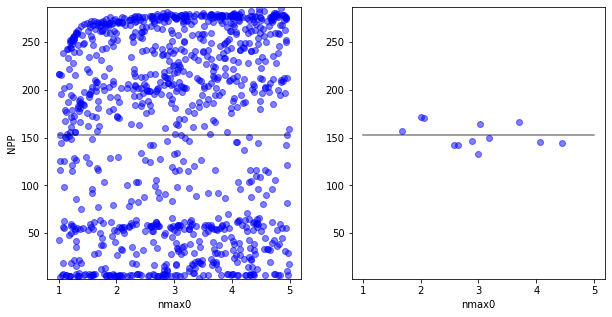

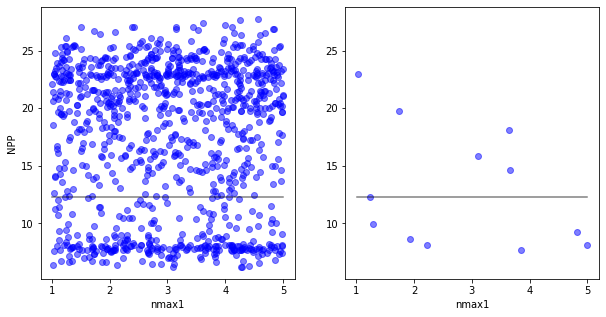

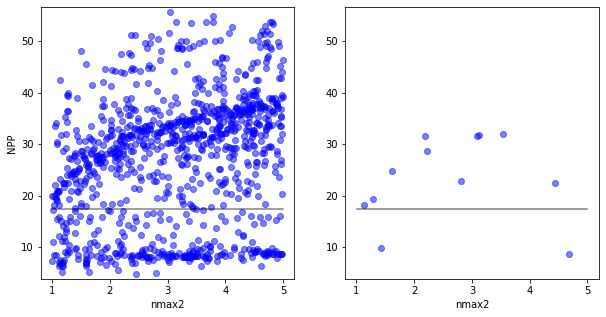

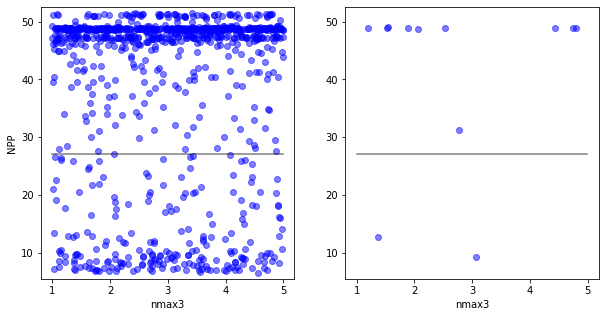

In [5]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='nmax'+str(i),ylabel='NPP')

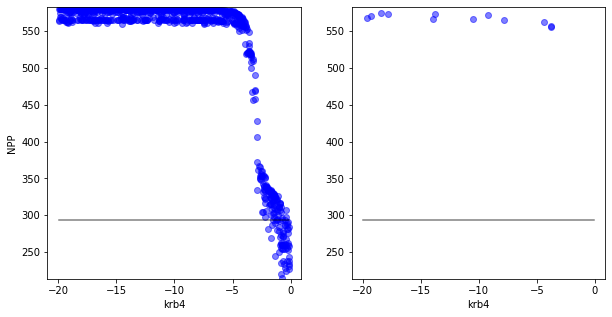

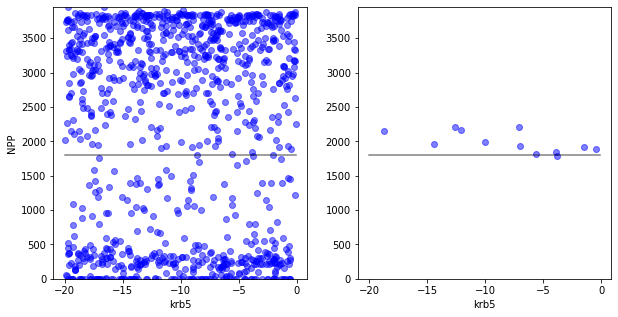

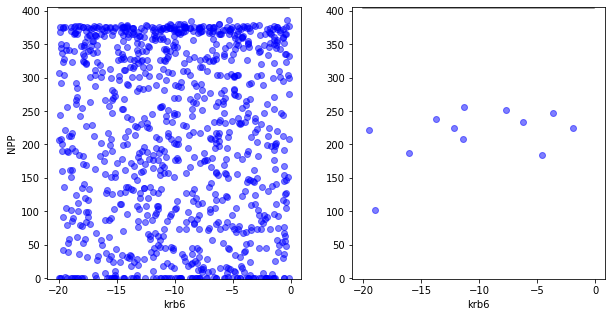

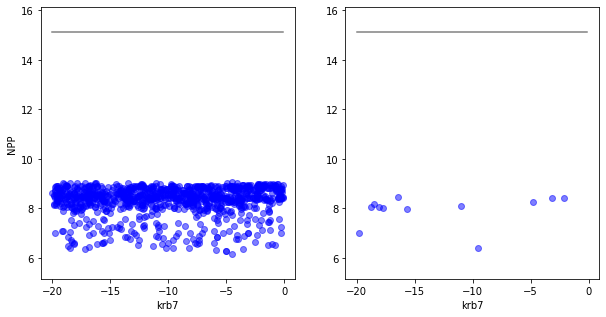

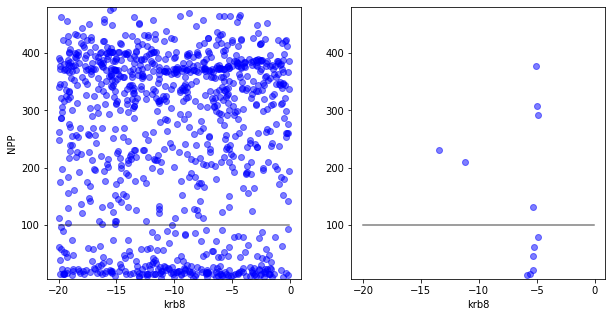

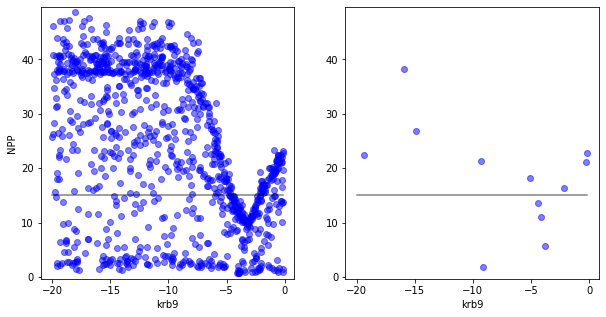

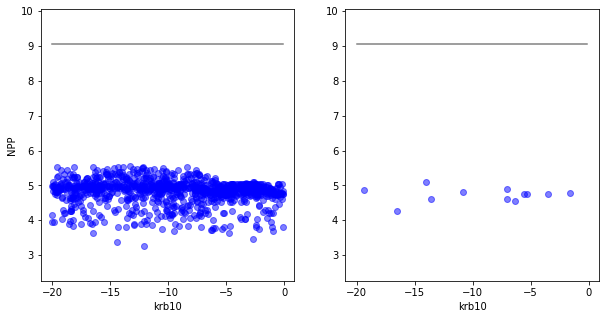

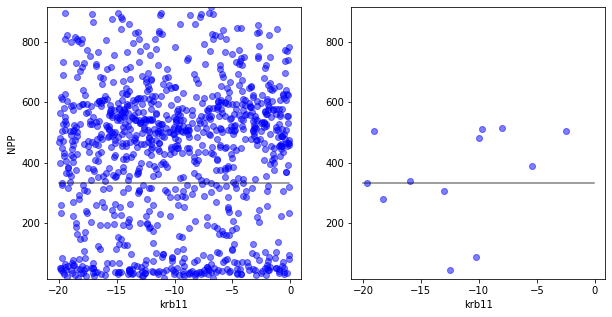

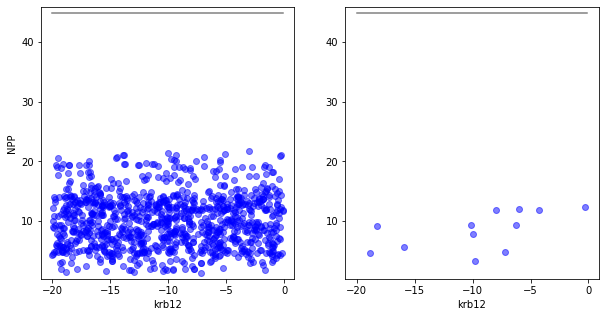

In [11]:
for i in range(4,13):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='krb'+str(i),ylabel='NPP')

## SA STEP2 bnd

In [50]:
path='SA-MD1-STEP2_bnd1/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

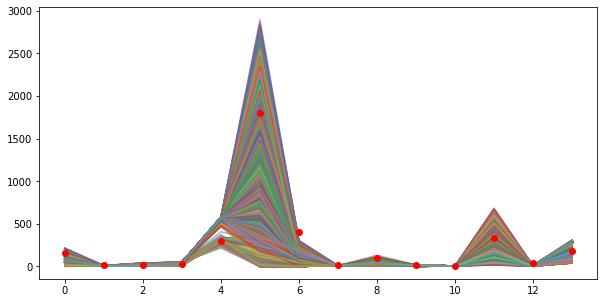

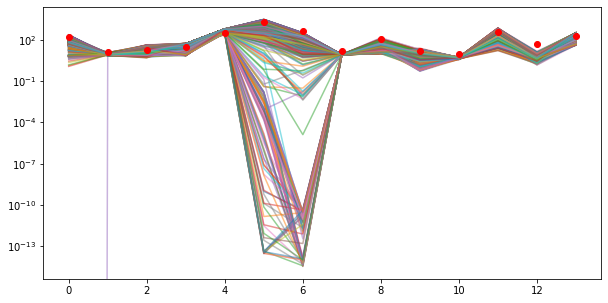

In [51]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

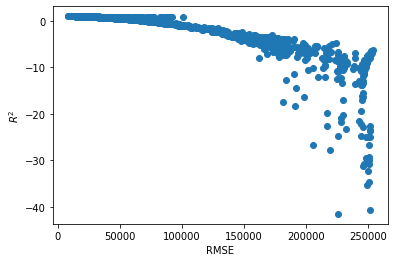

In [52]:
ut.plot_r2_rmse(df_model)

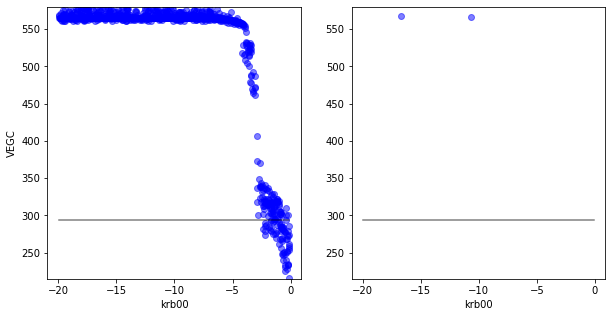

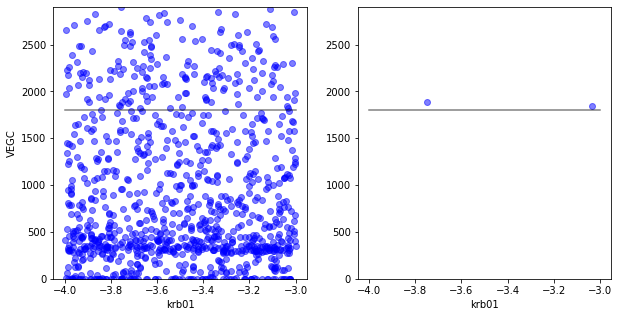

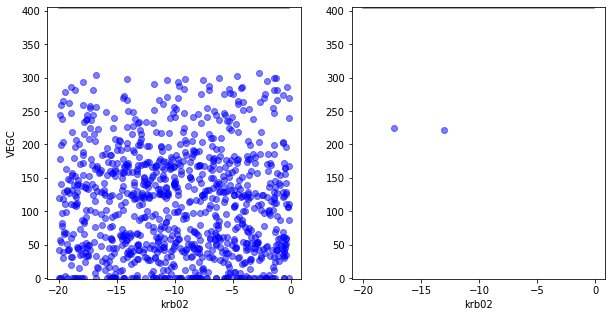

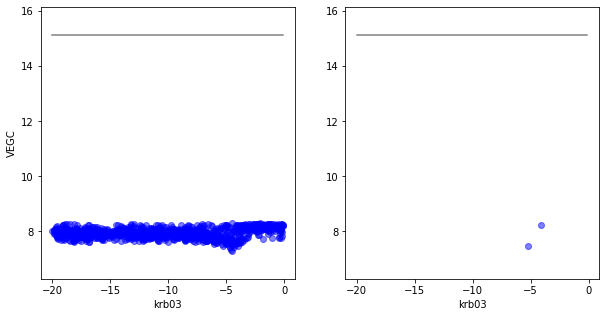

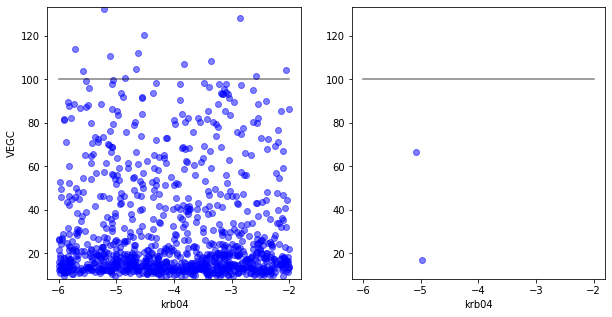

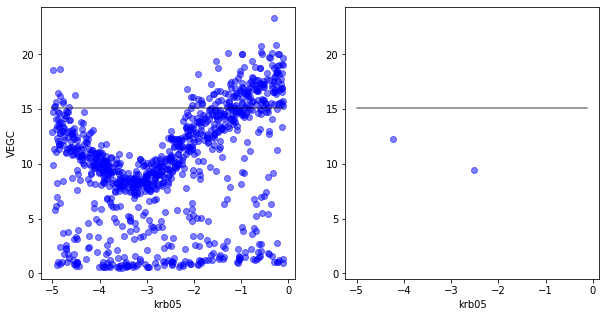

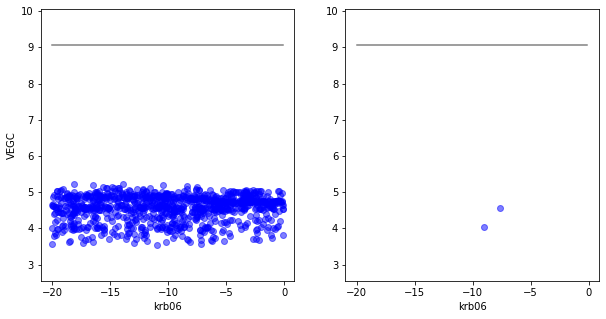

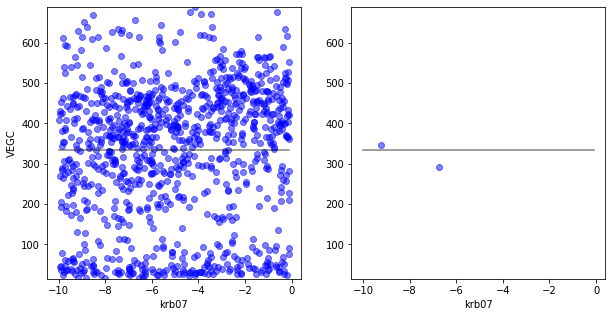

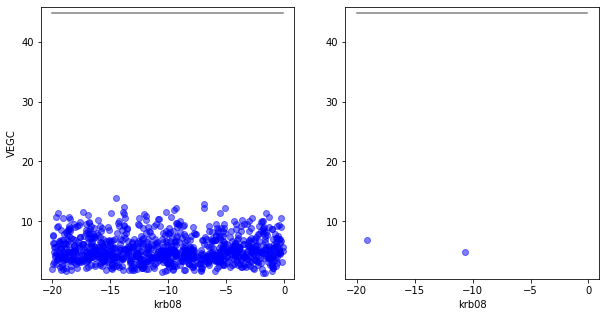

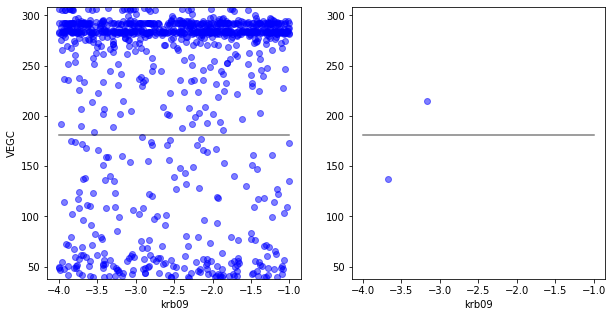

In [53]:
for i in range(4,14):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='krb0'+str(i-4),ylabel='VEGC')

## SA STEP2 bnd

In [44]:
path='SA-MD1-STEP2/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

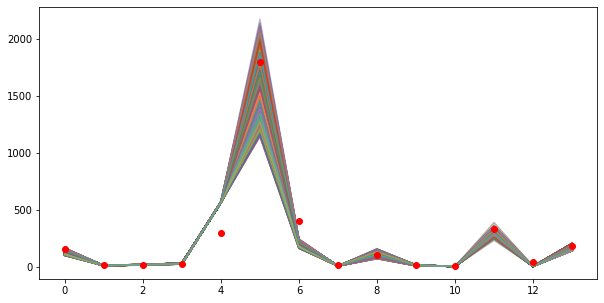

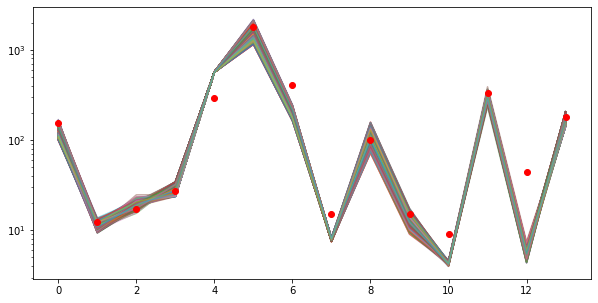

In [45]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

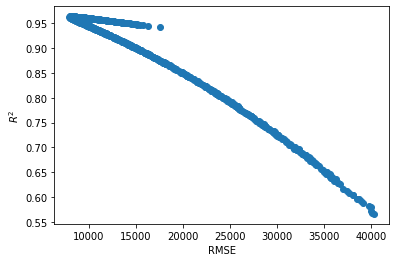

In [46]:
ut.plot_r2_rmse(df_model)

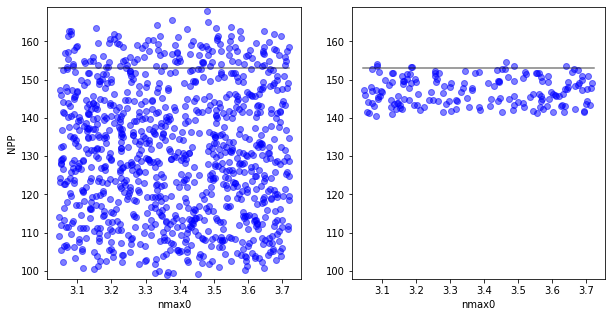

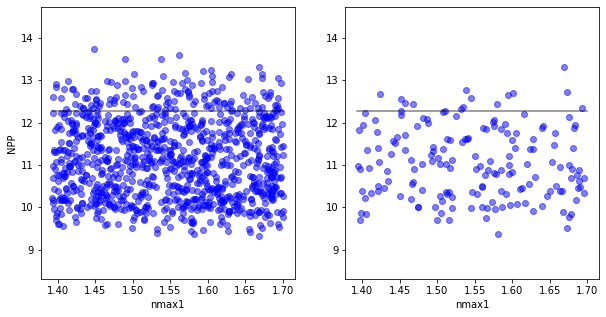

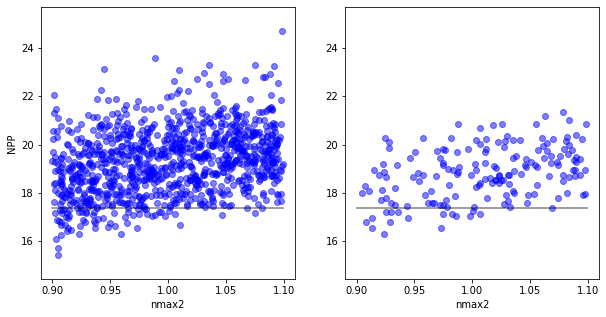

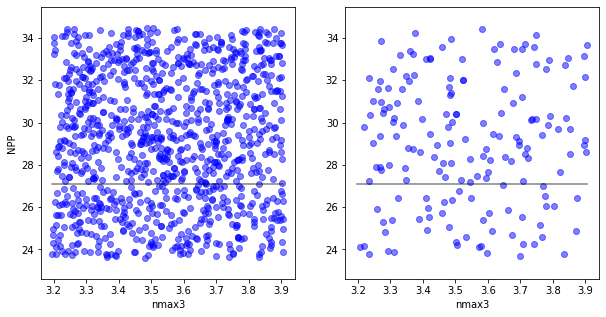

In [47]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='nmax'+str(i),ylabel='NPP')

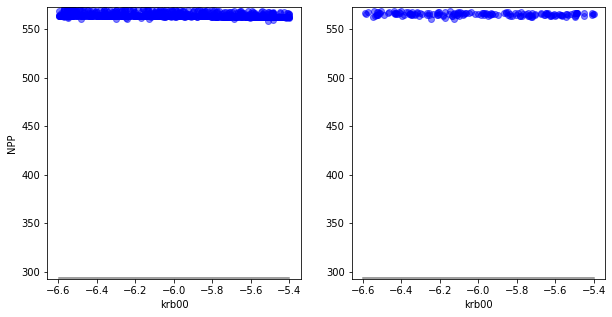

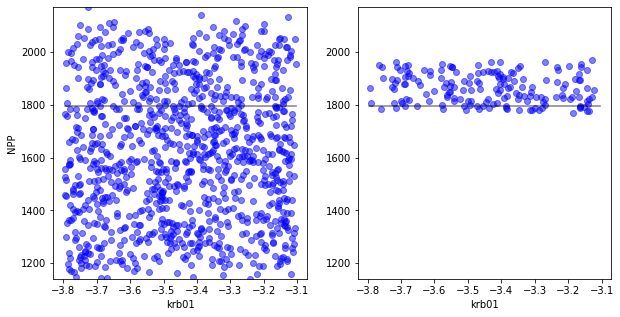

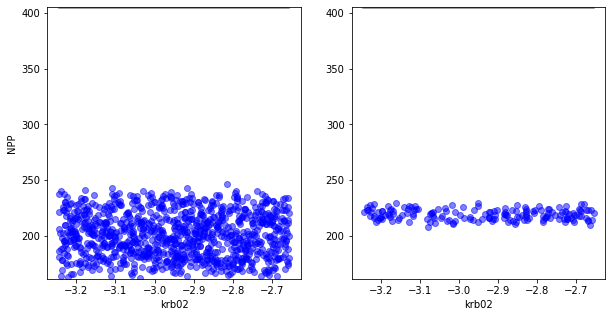

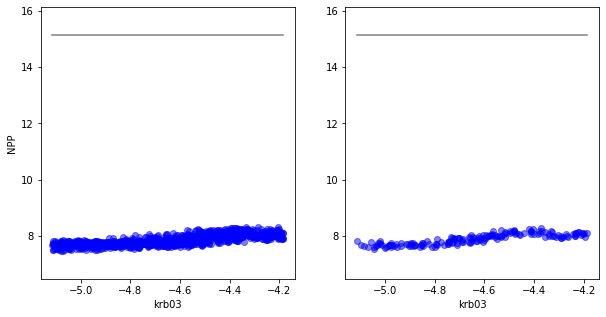

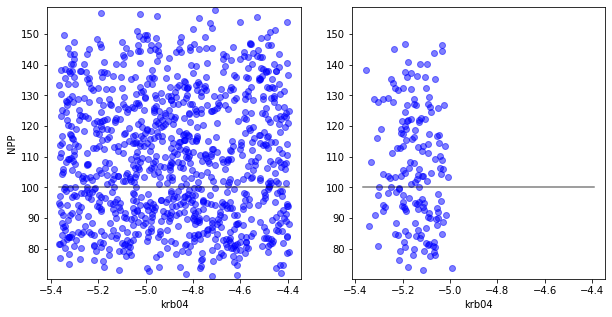

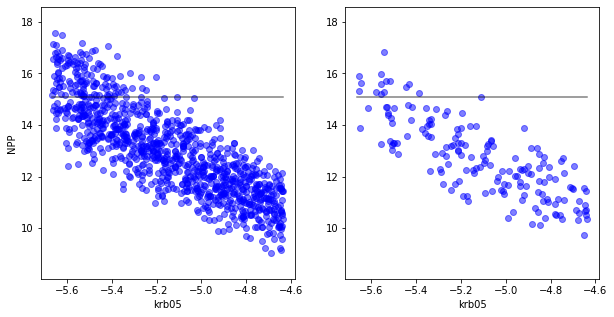

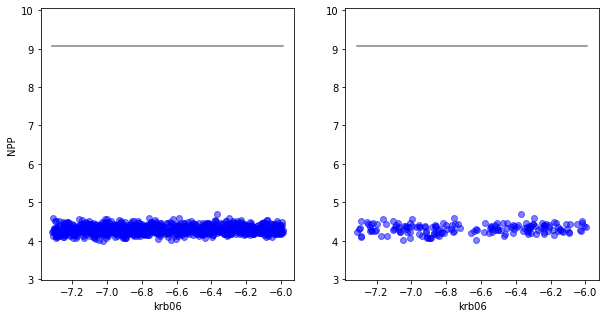

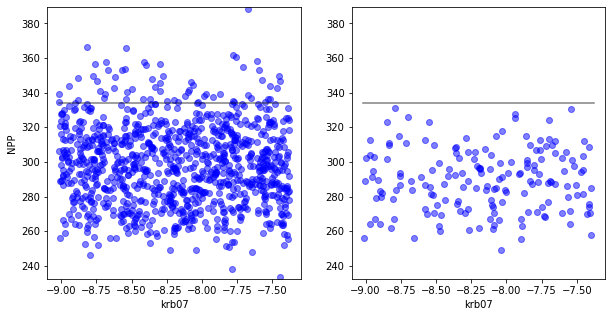

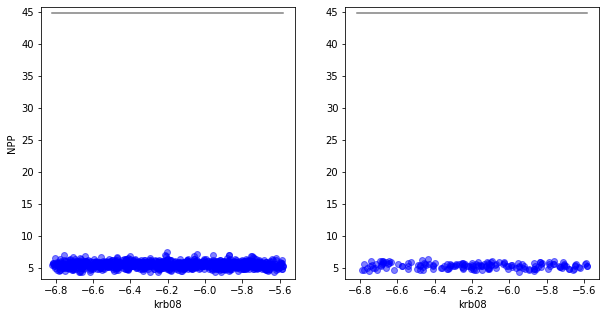

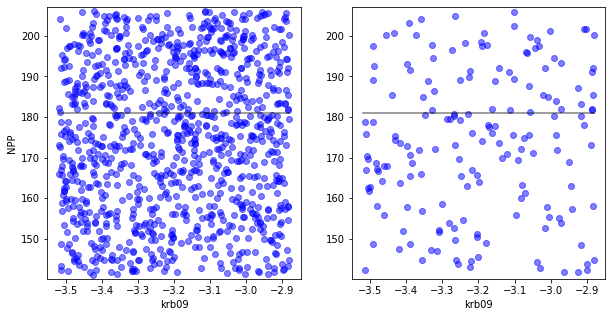

In [49]:
for i in range(4,14):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='krb0'+str(i-4),ylabel='NPP')

## SA STEP1

In [12]:
path='SA-MD1-STEP1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [13]:
df_param.head()

,cmax,cmax.1,cmax.2,cmax.3
0,304.672433,196.092846,288.617103,108.042352
1,171.394909,51.222722,61.658618,147.982790
2,442.861783,151.861485,49.029722,163.470253
3,583.949853,61.493824,103.332041,46.044853
4,261.797349,118.444634,187.567088,62.143091


In [14]:
df_model.head()

,0,1,2,3
0,247.941825,43.630780,63.702678,62.791961
1,139.592580,10.593281,13.564094,83.261826
2,368.682895,32.804915,10.911346,95.112943
3,477.904659,13.882124,23.064703,26.608003
4,204.237388,25.607911,41.812459,36.036832


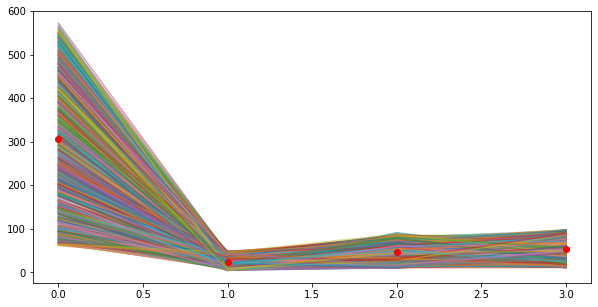

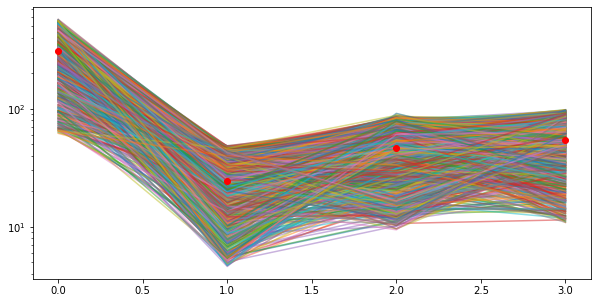

In [16]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

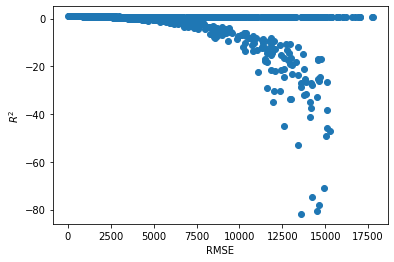

In [17]:
ut.plot_r2_rmse(df_model)

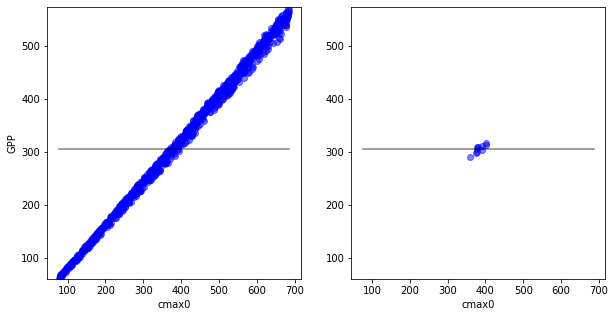

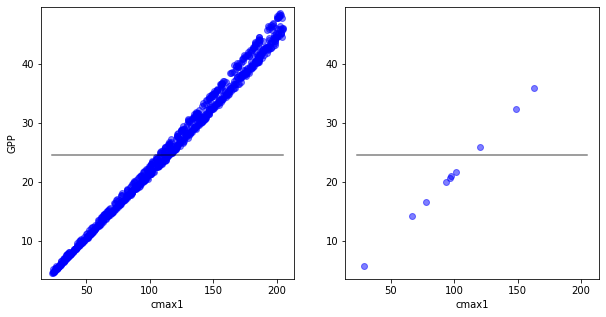

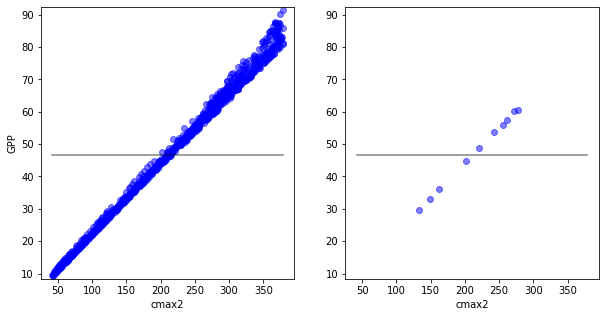

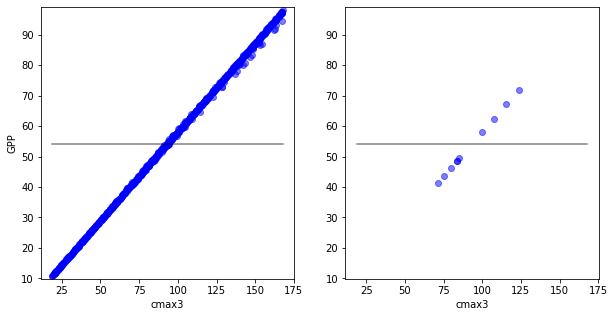

In [21]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i, \
                r2lim=0.99,xlabel='cmax'+str(i),ylabel='GPP')

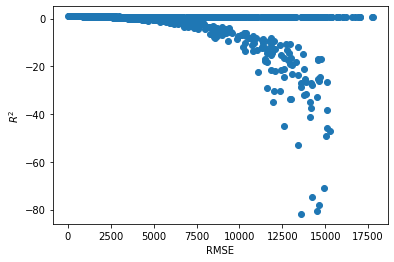

In [14]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

In [ ]:
this is dominate by the cmax0, how to grab other values assuming they are disjoint

In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)